# Oscilador Armónico Truncado


## Análisis



*En el presente trabajo observamos el problema que sería de un potencial de confinamiento de la forma de oscilador armónico, cuando se obtiene un problema tridimensional, en el que se tienen en cuenta las energías e interacciones núcleo-electrón, en los átomos, se reduce a un análisis de oscilador armónico unidimensional, debido a las aproximaciones del potencial a un potencial cuadrático, esta aproximación permite tener en cuenta interacciones entre potenciales atractivos y repulsivos, obteniendo un único potencial que sería llamado potencial efectivo.*

*En el siguiente código se ven graficadas las potencias efectivas del sistema, es decir la potencia de confinamiento que se verá para cada valor entero de l.*

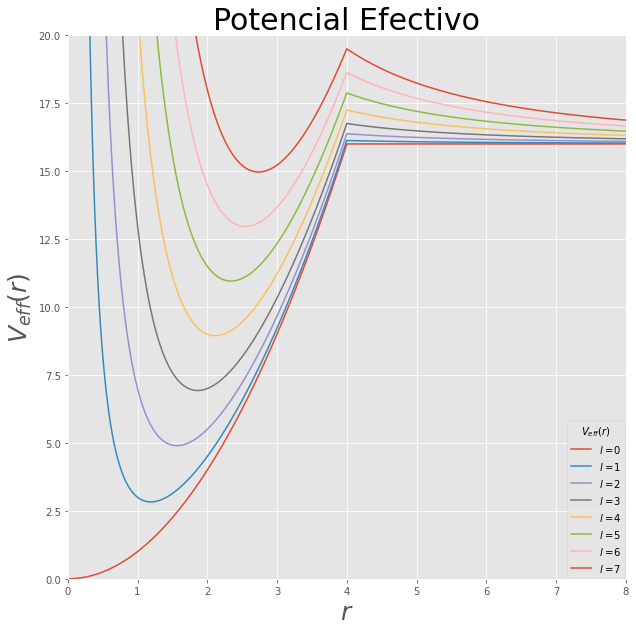

In [ ]:
##### POTENCIALES EFECTIVOS #####


# Se importan librerías necesarias.---------------------------------------------
from sympy.solvers.solveset import linsolve
from sympy import *
from scipy.special import erf 
from scipy import constants as sp
from scipy.integrate import odeint
from scipy import optimize as opt
import numpy as np
from math import e
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from matplotlib import style
from scipy.integrate import solve_ivp
style.use('ggplot')

plt.figure(figsize=(10, 10))
# Condiciones iniciales
y0 = [0.000, 0.00001]
t = np.linspace(0.00001, 4, 2000)
tt = np.linspace(4, 8, 2000)
Tiempo = np.concatenate((t, tt))
V = t**2 + (l/t**2)    
VV = 16 + (l/tt**2)
Potencial = np.concatenate((V, VV))

for i in range(0, 8):
    n = i
    j = n*(n+1)
    t = np.linspace(0.00001, 4, 2000)
    tt = np.linspace(4, 8, 2000)
    Tiempo = np.concatenate((t, tt))
    V = t**2 + (j/t**2)    
    VV = 16 + (j/tt**2)
    Potencial = np.concatenate((V, VV))
    plt.plot(Tiempo, Potencial,  label = "$l$ ="'{:.0f}'.format(n))
    plt.xlim(0, 8) 
    plt.ylim(0, 20) 
    plt.ylabel("$V_{eff}(r)$", fontsize = 25)
    plt.xlabel("$r$", fontsize = 25)
    plt.legend(loc = 'lower right', borderaxespad=0.1,title="$V_{eff}(r)$")
    plt.title ("Potencial Efectivo", fontsize = 30)


*En el siguiente código se muestra el resultado al que se ha llegado, siguiendo un proceso con las librerías de Python que nos permite resolver ecuaciones diferenciales, a su vez, se encuentran los niveles de energía a partir de condiciones de frontera y, por último, se muestra una gráfica con cada función de onda con su correspondiente nivel de energía.*

Introduzca valor de l = 0
ejecutando....
[2.994182109016596, 6.995627247475406, 10.993262100780777, 14.86105208519405]
terminado


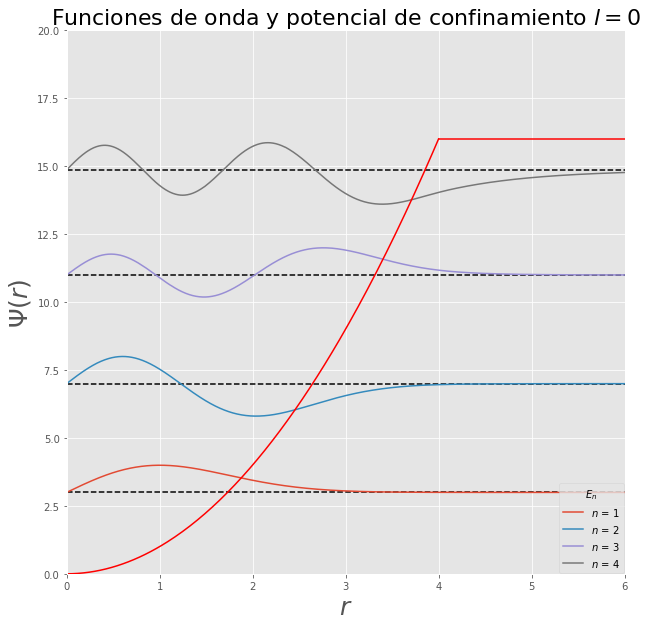

In [ ]:
# Se importan librerías necesarias.---------------------------------------------
from sympy.solvers.solveset import linsolve
from sympy import *
from scipy.special import erf 
from scipy import constants as sp
from scipy.integrate import odeint
from scipy import optimize as opt
import numpy as np
from math import e
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from matplotlib import style
import matplotlib.ticker as ticker
from scipy.integrate import solve_ivp
style.use('ggplot')

plt.figure(figsize=(10, 10))
# Condiciones iniciales
y0 = [0.000, 0.00001]
t = np.linspace(0.00001, 8, 2000)
n = int(input("Introduzca valor de l = "))
l = n*(n+1)


def Potencial(t, l):
    if t <= 4:
        V = (t**2) + (l/t**2)
    else:
        V = (4**2) + (l/t**2)
    return V
def derivada(y, t, lamb):
    f, df = y
    dy = [df, -(lamb - Potencial(t,l))*f]
    return dy

### Método para las energías
def fb(lamb):
    sol = odeint(derivada, y0, t, args = (lamb,))
    f_b = sol[-1,0]
    return f_b

def main():
    en = np.linspace(0, (4**2) + (l/4**2), 30)
    e_iz = en[0]
    xE = [] 
    for i in range(1, len(en)):
        sol_iz = fb(e_iz)
        e_de = en[i]
        sol_de = fb(e_de)
        if(sol_de*sol_iz <0.):
            raiz = opt.bisect(fb, e_iz, e_de, maxiter = 10000, xtol = 10e-20)
            xE.append(raiz)
        e_iz = e_de
    print(xE)

## Grafica
    xt = np.linspace(0,25, 200)
    xttt = np.linspace(0.0001,4, 200)
    xtt = np.linspace(-4,8, 200)
    lin = np.linspace(4,25, 200)

    for i in range(0, (len(xE))):
        lamb =xE[i]
        fonda = odeint(derivada, y0, t, args = (lamb,))
        onda = fonda[:,0]
        gtv = max(onda)
        plt.plot(xt, [lamb for i in xt], '--k')
        plt.plot(t, (onda/gtv)+lamb, label = "$n$ = "'{:.0f}'.format(i + 1))
    plt.plot(xttt,xttt**2 + (l/xttt**2), 'r')
    plt.plot(lin, 4**2 + (l/(lin**2)) , 'r')
    plt.legend(loc = 'lower right', borderaxespad=0.1,title="$E_{n}$")
    plt.xlim(0, 6) 
    plt.ylim(0, 20) 
    # plt.show()

plt.ylabel("$\Psi(r)$", fontsize = 25)
plt.xlabel("$r$", fontsize = 25)
plt.title ( label = "Funciones de onda y potencial de confinamiento $l =$"'{:.0f}'.format(n), fontsize = 22)
if __name__=="__main__":
    print('ejecutando....')
    main()
    print('terminado')